## Downloading Dataset

In [347]:
!unzip /content/drive/MyDrive/DataMiningProject/DataMiningProject.zip

Archive:  /content/drive/MyDrive/DataMiningProject/DataMiningProject.zip
replace DataMiningProject/atp_2021.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: DataMiningProject/atp_2021.xlsx  
  inflating: __MACOSX/DataMiningProject/._atp_2021.xlsx  
  inflating: DataMiningProject/atp_2017.xlsx  
  inflating: __MACOSX/DataMiningProject/._atp_2017.xlsx  
  inflating: DataMiningProject/atp_2009.xls  
  inflating: __MACOSX/DataMiningProject/._atp_2009.xls  
  inflating: DataMiningProject/atp_2016.xlsx  
  inflating: __MACOSX/DataMiningProject/._atp_2016.xlsx  
  inflating: DataMiningProject/atp_2008.xls  
  inflating: __MACOSX/DataMiningProject/._atp_2008.xls  
  inflating: DataMiningProject/atp_2020.xlsx  
  inflating: __MACOSX/DataMiningProject/._atp_2020.xlsx  
  inflating: DataMiningProject/atp_2012.xls  
  inflating: __MACOSX/DataMiningProject/._atp_2012.xls  
  inflating: DataMiningProject/atp_2006.xls  
  inflating: __MACOSX/DataMiningProject/._atp_2006.xls  
  inflating: D

In [348]:
import pandas as pd

pd.read_excel('/content/DataMiningProject/atp_2000.xls')

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2,1,Completed
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2,1,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,69,Lisbon,Masters Cup,2000-11-27,Masters Cup,Indoor,Hard,Round Robin,3,Sampras P.,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
2959,69,Lisbon,Masters Cup,2000-11-27,Masters Cup,Indoor,Hard,Round Robin,3,Sampras P.,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
2960,69,Lisbon,Masters Cup,2000-11-27,Masters Cup,Indoor,Hard,Semifinals,3,Agassi A.,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Completed
2961,69,Lisbon,Masters Cup,2000-11-27,Masters Cup,Indoor,Hard,Semifinals,3,Kuerten G.,...,3.0,6.0,4.0,NaN,NaN,NaN,NaN,2,1,Completed


## Preparing Data

### Matches

#### Combining years all together

In [349]:
import os
import pandas as pd

path_to_dir = '/content/DataMiningProject'
dataframes_of_matches = []

for file_path in os.listdir(path_to_dir):
  direct_path_to_file = os.path.join(path_to_dir, file_path)
  if file_path.endswith('.xls') or file_path.endswith('.xlsx'):
    df = pd.read_excel(direct_path_to_file,)
    if 'atp_players' not in file_path:
      dataframes_of_matches.append(df)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [350]:
matches = pd.concat(dataframes_of_matches, ignore_index=True)

#### Cleaning

In [351]:
matches = matches.drop(columns=['ATP'])

New feature country

In [352]:
import requests, json

my_yandex_maps_api_key = '4405e07d-8fde-45f6-afb6-97a201b1a210'


def get_country_name(town):
  url = f'https://geocode-maps.yandex.ru/1.x/?apikey={my_yandex_maps_api_key}&format=json&geocode={town}&lang=en_US'
  resp = requests.get(url)
  answer = json.loads(resp.content)
  tmp = answer['response']['GeoObjectCollection']['featureMember']
  if len(tmp) == 0:
    return 'YYY'
  resp = answer['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['metaDataProperty']['GeocoderMetaData']['AddressDetails']['Country']['CountryName']
  return resp

In [353]:
# city_to_country = {}
# for city in matches["Location"].unique():
#   city_to_country[city] = get_country_name(city)
# city_to_country

In [354]:
city_to_country = {'Adelaide': 'Australia',
 'Chennai': 'India',
 'Doha': 'Qatar',
 'Auckland': 'New Zealand',
 'Sydney': 'Australia',
 'Melbourne': 'Australia',
 'Bogota': 'Colombia',
 'Milan': 'Italy',
 'Copenhagen': 'Denmark',
 'Marseille': 'France',
 'Vina del Mar': 'Chile',
 'Buenos Aires': 'Argentina',
 'Memphis': 'United States of America',
 'Rotterdam': 'Netherlands',
 'Acapulco': 'Mexico',
 'Dubai': 'United Arab Emirates',
 'San Jose': 'United States of America',
 'Delray Beach': 'United States of America',
 'Scottsdale': 'United States of America',
 'Indian Wells': 'United States of America',
 'Miami': 'United States of America',
 'Casablanca': 'Morocco',
 'Estoril': 'Portugal',
 'Monte Carlo': 'Monaco',
 'Atlanta': 'United States of America',
 'Barcelona': 'Spain',
 'Houston': 'United States of America',
 'Mallorca': 'Spain',
 'Munich': 'Germany',
 'Rome': 'Italy',
 'Hamburg': 'Germany',
 'St. Polten': 'YYY',
 'Paris': 'France',
 'Halle': 'Germany',
 'Queens Club': 'United Kingdom',
 'Nottingham': 'United Kingdom',
 "'s-Hertogenbosch": 'Netherlands',
 'London': 'United Kingdom',
 'Bastad': 'Sweden',
 'Gstaad': 'Switzerland',
 'Newport': 'United Kingdom',
 'Amsterdam': 'Netherlands',
 'Stuttgart': 'Germany',
 'Umag': 'Croatia',
 'Kitzbuhel': 'Austria',
 'Los Angeles': 'United States of America',
 'Sopot': 'Poland',
 'Montreal': 'Canada',
 'Cincinnati': 'United States of America',
 'Indianapolis': 'United States of America',
 'Washington': 'United States of America',
 'Long Island': 'Falkland Islands',
 'New York': 'United States of America',
 'Bucharest': 'Romania',
 'Salvador': 'Brazil',
 'Tashkent': 'Uzbekistan',
 'Shanghai': 'China',
 'Hong Kong': 'China',
 'Palermo': 'Italy',
 'Moscow': 'Russian Federation',
 'Tokyo': 'Japan',
 'Lyon': 'France',
 'Vienna': 'Austria',
 'Basel': 'Switzerland',
 'St. Petersburg': 'Russian Federation',
 'Stockholm': 'Sweden',
 'Dubai ': 'United Arab Emirates',
 'Estoril ': 'Portugal',
 'Valencia': 'Spain',
 'Amersfoort': 'Netherlands',
 'Costa Do Sauipe': 'Brazil',
 'Bangkok': 'Thailand',
 'Metz': 'France',
 'Vienna ': 'Austria',
 'Madrid': 'Spain',
 'New Haven': 'United States of America',
 'Beijing': 'China',
 'Ho Chi Min City': 'Vietnam',
 'Brisbane': 'Australia',
 'Montpellier': 'France',
 'Zagreb': 'Croatia',
 'Rio de Janeiro': 'Brazil',
 'Sao Paulo': 'Brazil',
 'Oeiras': 'Portugal',
 'Dusseldorf': 'Germany',
 'Nice': 'France',
 'Eastbourne': 'United Kingdom',
 'Toronto': 'Canada',
 'Winston-Salem': 'United States of America',
 'Kuala Lumpur': 'Malaysia',
 'Shenzhen ': 'China',
 'Pune': 'India',
 'Cordoba': 'Spain',
 'Dallas': 'United States of America',
 'Santiago': 'Chile',
 'Marrakech': 'Morocco',
 'Banja Luka': 'Bosnia and Herzegovina',
 'Sofia': 'Bulgaria',
 'Budapest': 'Hungary',
 'Geneva': 'Switzerland',
 'Antalya': 'Türkiye',
 'Los Cabos': 'Mexico',
 'Chengdu': 'China',
 'Zhuhai': 'China',
 'Antwerp': 'Belgium',
 'Johannesburg ': 'Republic of South Africa',
 'Belgrade': 'Serbia',
 'Singapore': 'Singapore',
 'Cagliari': 'Italy',
 'Marbella': 'Spain',
 'Parma': 'Italy',
 'Nur-Sultan': 'Kazakhstan',
 'San Diego': 'United States of America',
 'Turin': 'Italy',
 'Mexico City': 'Mexico',
 'Orlando': 'United States of America',
 'San Marino': 'San Marino',
 'Toulouse': 'France',
 'Brighton': 'United Kingdom',
 'Lisbon': 'Portugal',
 'Las Vegas': 'United States of America',
 'Portschach': 'Austria',
 'Mumbai': 'India',
 'Quito': 'Ecuador',
 'Istanbul': 'Türkiye',
 'Warsaw': 'Poland',
 'Seoul': 'Republic of Korea',
 'Tel Aviv': 'Israel',
 'Florence': 'Italy',
 'Gijon': 'Spain',
 'Napoli': 'Italy',
 'Cologne': 'Germany',
 'Sardinia': 'Italy'}

In [355]:
matches['Country'] = matches['Location'].apply(lambda x: city_to_country[x])

In [356]:
matches['Winner'] = matches['Winner'].apply(lambda x: x.replace('.', ''))
matches['Loser'] = matches['Loser'].apply(lambda x: x.replace('.', ''))
matches

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,EXL,LBW,LBL,SJW,SJL,B&WW,B&WL,UBW,UBL,Country
0,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Giron M,Gasquet R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
1,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Mcdonald M,Galan DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
2,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Kecmanovic M,O Connell C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
3,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Nishioka Y,Rune H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
4,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Popyrin A,Auger-Aliassime F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62297,London,Masters Cup,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Nadal R,Ferrer D,...,4.30,1.22,4.33,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
62298,London,Masters Cup,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Wawrinka S,Murray A,...,1.65,2.20,1.67,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
62299,London,Masters Cup,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Djokovic N,Nadal R,...,4.30,1.20,4.50,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
62300,London,Masters Cup,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Federer R,Wawrinka S,...,3.20,1.30,3.50,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom


In [357]:
matches.columns

Index(['Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round',
       'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1',
       'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW',
       'AvgL', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL', 'EXW',
       'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'B&WW', 'B&WL', 'UBW', 'UBL',
       'Country'],
      dtype='object')

Instead of nan values let's put zeros

In [358]:
matches[['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5']] = matches[['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5']].fillna(0)

In [359]:
matches.head(5)

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,EXL,LBW,LBL,SJW,SJL,B&WW,B&WL,UBW,UBL,Country
0,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Giron M,Gasquet R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
1,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Mcdonald M,Galan DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
2,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Kecmanovic M,O Connell C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
3,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Nishioka Y,Rune H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
4,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Popyrin A,Auger-Aliassime F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia


In [360]:
import numpy as np

avg = np.nanmean(matches['Best of'])
matches.loc[matches['Best of'].isna(), 'Best of'] = avg
matches

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,EXL,LBW,LBL,SJW,SJL,B&WW,B&WL,UBW,UBL,Country
0,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Giron M,Gasquet R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
1,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Mcdonald M,Galan DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
2,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Kecmanovic M,O Connell C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
3,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Nishioka Y,Rune H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
4,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Popyrin A,Auger-Aliassime F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62297,London,Masters Cup,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Nadal R,Ferrer D,...,4.30,1.22,4.33,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
62298,London,Masters Cup,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Wawrinka S,Murray A,...,1.65,2.20,1.67,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
62299,London,Masters Cup,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Djokovic N,Nadal R,...,4.30,1.20,4.50,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
62300,London,Masters Cup,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Federer R,Wawrinka S,...,3.20,1.30,3.50,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom


In [361]:
avg = np.nanmean(matches['Wsets'])
matches.loc[matches['Wsets'].isna(), 'Wsets'] = avg

In [362]:
avg = np.nanmean(matches['Lsets'])
matches.loc[matches['Lsets'].isna(), 'Lsets'] = avg

In [363]:
cols_to_drop = ['Tournament', 'Comment','CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL', 'B&WW', 'B&WL', 'WPts', 'LPts', 'EXW', 'EXL', 'PSW', 'PSL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'UBW', 'UBL']

matches.drop(columns=cols_to_drop, inplace=True)


In [364]:
matches

,Location,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,...,L3,W4,L4,W5,L5,Wsets,Lsets,B365W,B365L,Country
0,Adelaide,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Giron M,Gasquet R,61.0,...,5.0,0.0,0.0,0.0,0.0,2.0,1.0,1.91,1.91,Australia
1,Adelaide,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Mcdonald M,Galan DE,63.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.36,3.20,Australia
2,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Kecmanovic M,O Connell C,29.0,...,0,0.0,0.0,0.0,0.0,2.0,0.0,1.57,2.38,Australia
3,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Nishioka Y,Rune H,36.0,...,4.0,0.0,0.0,0.0,0.0,2.0,1.0,3.75,1.29,Australia
4,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Popyrin A,Auger-Aliassime F,120.0,...,0,0.0,0.0,0.0,0.0,2.0,0.0,6.50,1.11,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62297,London,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Nadal R,Ferrer D,5.0,...,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.20,4.50,United Kingdom
62298,London,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Wawrinka S,Murray A,4.0,...,0,0.0,0.0,0.0,0.0,2.0,0.0,2.30,1.61,United Kingdom
62299,London,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Djokovic N,Nadal R,1.0,...,0,0.0,0.0,0.0,0.0,2.0,0.0,1.20,4.50,United Kingdom
62300,London,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Federer R,Wawrinka S,3.0,...,0,0.0,0.0,0.0,0.0,2.0,0.0,1.30,3.50,United Kingdom


In [365]:
avg = np.nanmean(matches['B365W'])
matches.loc[matches['B365W'].isna(), 'B365W'] = avg

In [366]:
avg = np.nanmean(matches['B365L'])
matches.loc[matches['B365L'].isna(), 'B365L'] = avg

In [367]:
matches['win'] = 1

In [368]:
cols_to_rename = {
    'Winner': 'first_name',
    'Loser': 'second_name',
    'WRank': 'first_rank',
    'LRank': 'second_rank',
    'W1': 'first_1',
    'L1': 'second_1',
    'W2': 'first_2',
    'L2': 'second_2',
    'W3': 'first_3',
    'L3': 'second_3',
    'W4': 'first_4',
    'L4': 'second_4',
    'W5': 'first_5',
    'L5': 'second_5',
    'Wsets': 'first_sets',
    'Lsets': 'second_sets',
    'B365W': 'first_6',
    'B365L': 'second_6',
}
matches = matches.rename(columns=cols_to_rename)
matches.head()

,Location,Date,Series,Court,Surface,Round,Best of,first_name,second_name,first_rank,...,first_4,second_4,first_5,second_5,first_sets,second_sets,first_6,second_6,Country,win
0,Adelaide,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Giron M,Gasquet R,61.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.91,1.91,Australia,1
1,Adelaide,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Mcdonald M,Galan DE,63.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.36,3.20,Australia,1
2,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Kecmanovic M,O Connell C,29.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.57,2.38,Australia,1
3,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Nishioka Y,Rune H,36.0,...,0.0,0.0,0.0,0.0,2.0,1.0,3.75,1.29,Australia,1
4,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Popyrin A,Auger-Aliassime F,120.0,...,0.0,0.0,0.0,0.0,2.0,0.0,6.50,1.11,Australia,1


### Players

In [369]:
players = pd.read_csv('/content/DataMiningProject/atp_players.csv')
new_features = pd.read_csv('/content/new_feautures.csv')
new_features = new_features[['full_name', ] + list(new_features.columns[10:-1])]
players = players.merge(new_features, left_on='full_name', right_on='full_name', how='inner')
players

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,backhand,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,NaN,0.82,0.63,0.28,0.45,11,0.36,29,0.14,0.34
3,a004,Egan,E,Adams,Adams E,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,...,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
4,a006,Ronald,R,Agenor,Agenor R,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,...,NaN,0.70,0.59,0.30,0.51,1500,0.40,2466,0.25,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,z431,Nicolas,N,Zahar,Zahar N,http://www.atpworldtour.com/en/players/nicolas...,EGY,NaN,NaN,NaN,...,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
10879,z435,A.,A,Zorab,Zorab A,http://www.atpworldtour.com/en/players/a-zorab...,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
10880,z436,G.,G,Zinn,Zinn G,http://www.atpworldtour.com/en/players/g-zinn/...,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
10881,z440,C.,C,Zenger,Zenger C,http://www.atpworldtour.com/en/players/c-zenge...,GER,NaN,NaN,NaN,...,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00


#### Cleaning

In [370]:
players.columns

Index(['player_id', 'first_name', 'first_initial', 'last_name', 'full_name',
       'player_url', 'flag_code', 'residence', 'birthplace', 'birthdate',
       'birth_year', 'birth_month', 'birth_day', 'turned_pro', 'weight_lbs',
       'weight_kg', 'height_ft', 'height_inches', 'height_cm', 'handedness',
       'backhand', 'service_games_won', 'total_service_points_won',
       '1st_serve_return_points_won', '2nd_serve_return_points_won',
       'break_points_opportunities', 'break_points_converted',
       'return_games_played', 'return_games_won', 'return_points_won'],
      dtype='object')

In [371]:
players = players.drop(columns=[
    'first_initial', 'player_url', 'height_ft',
    'height_inches', 'birth_day', 'birth_month',
    'birthdate', 'birthplace',
    'weight_lbs', 'handedness', 'residence', 'backhand', 'first_name', 'last_name'])

In [372]:
players

,player_id,full_name,flag_code,birth_year,turned_pro,weight_kg,height_cm,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won
0,a002,Acuna R,CHI,1958.0,0.0,68.0,175.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
1,a001,Abdullahi S,NGR,1960.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
2,a005,Aerts N,BRA,1963.0,0.0,75.0,188.0,0.82,0.63,0.28,0.45,11,0.36,29,0.14,0.34
3,a004,Adams E,USA,1959.0,0.0,73.0,178.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
4,a006,Agenor R,USA,1964.0,1983.0,82.0,180.0,0.70,0.59,0.30,0.51,1500,0.40,2466,0.25,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,z431,Zahar N,EGY,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
10879,z435,Zorab A,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
10880,z436,Zinn G,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00
10881,z440,Zenger C,GER,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00


In [373]:
players.isna().sum()

player_id                         0
full_name                         0
flag_code                      2161
birth_year                     5771
turned_pro                     9350
weight_kg                      8178
height_cm                      8226
service_games_won                 0
total_service_points_won          0
1st_serve_return_points_won       0
2nd_serve_return_points_won       0
break_points_opportunities        0
break_points_converted            0
return_games_played               0
return_games_won                  0
return_points_won                 0
dtype: int64

In [374]:
players = players[~players.full_name.duplicated()]

Some of players the country name absent

In [375]:
ioc = pd.read_html('https://en.wikipedia.org/wiki/List_of_IOC_country_codes')[0]
ioc = ioc.assign(Code=ioc['Code'].str[-3:]).set_index('Code')['National Olympic Committee']
ioc.loc['YUG'] = 'Yugoslavia'
ioc.loc['LIB'] = 'Lebanon'
ioc.loc['RHO'] = 'Zimbabwe'
ioc.loc['SIN'] = 'Singapore'
ioc.loc['AHO'] = 'Netherlands'


In [376]:
players['Country'] = players['flag_code'].map(ioc)

<ipython-input-376-6bc6fa84e48f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['Country'] = players['flag_code'].map(ioc)


In [377]:
players

,player_id,full_name,flag_code,birth_year,turned_pro,weight_kg,height_cm,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,Country
0,a002,Acuna R,CHI,1958.0,0.0,68.0,175.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Chile
1,a001,Abdullahi S,NGR,1960.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Nigeria
2,a005,Aerts N,BRA,1963.0,0.0,75.0,188.0,0.82,0.63,0.28,0.45,11,0.36,29,0.14,0.34,Brazil
3,a004,Adams E,USA,1959.0,0.0,73.0,178.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,United States
4,a006,Agenor R,USA,1964.0,1983.0,82.0,180.0,0.70,0.59,0.30,0.51,1500,0.40,2466,0.25,0.38,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,z431,Zahar N,EGY,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Egypt
10879,z435,Zorab A,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10880,z436,Zinn G,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10881,z440,Zenger C,GER,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Germany


In [378]:
players['Country'].unique()

array(['Chile', 'Nigeria', 'Brazil', 'United States', 'Spain',
       'Netherlands', 'Italy', 'Australia', 'Great Britain', 'Sweden',
       'India', 'Austria', 'Argentina', 'Peru', 'Venezuela',
       'South Africa', 'Colombia', 'Bulgaria', 'Bermuda', 'Israel', nan,
       'Iran', 'Mexico', 'Bahamas', 'Germany', 'Morocco', 'France',
       'Niger', 'Denmark', 'Qatar', 'Norway', 'Switzerland', 'Azerbaijan',
       'Croatia', 'Romania', 'South Korea', 'Lebanon',
       'United Arab Emirates', 'Kuwait', 'Russia', 'Canada', 'Tunisia',
       'Portugal', 'Oman', 'Greece', 'El Salvador', 'Turkey', 'Indonesia',
       'Ukraine', 'Kazakhstan', 'Syria', 'Belgium', 'Moldova',
       'Bosnia and Herzegovina', 'Monaco', 'Malaysia', 'Hungary',
       'Philippines', 'Uruguay', 'Pakistan', 'Armenia', 'New Zealand',
       'Japan', 'Bolivia', 'Czechia', 'Jamaica', 'Egypt', 'Finland',
       'Zimbabwe', 'Slovenia', 'Slovakia', 'Cyprus', 'Poland', 'Serbia',
       'Belarus', 'China', 'Lithuania', 'Thai

here are some contries that named differently but means one country


In [379]:
def rename_countries(cn):
  country_mapping = {
    'Chinese Taipei[8]': 'China',
    'United States': 'United States of America',
    'Great Britain': 'United Kingdom'
  }
  return country_mapping.get(cn, cn)

players['Country'] = players['Country'].apply(rename_countries)
unique_countries = players['Country'].unique()


<ipython-input-379-7b21fb7d7bbf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['Country'] = players['Country'].apply(rename_countries)


In [380]:
players

,player_id,full_name,flag_code,birth_year,turned_pro,weight_kg,height_cm,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,Country
0,a002,Acuna R,CHI,1958.0,0.0,68.0,175.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Chile
1,a001,Abdullahi S,NGR,1960.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Nigeria
2,a005,Aerts N,BRA,1963.0,0.0,75.0,188.0,0.82,0.63,0.28,0.45,11,0.36,29,0.14,0.34,Brazil
3,a004,Adams E,USA,1959.0,0.0,73.0,178.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,United States of America
4,a006,Agenor R,USA,1964.0,1983.0,82.0,180.0,0.70,0.59,0.30,0.51,1500,0.40,2466,0.25,0.38,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,z431,Zahar N,EGY,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Egypt
10879,z435,Zorab A,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10880,z436,Zinn G,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10881,z440,Zenger C,GER,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Germany


In [381]:
import numpy as np
all_valid_pro_years = players[(players['turned_pro'] != 0) & (~players['turned_pro'].isna())][['birth_year','turned_pro']]
mean_diff = int((all_valid_pro_years['turned_pro'] - all_valid_pro_years['birth_year']).mean())
players.loc[(players['turned_pro'].isna()) | (players['turned_pro'] == 0), 'turned_pro'] = players['birth_year'] + mean_diff
players

,player_id,full_name,flag_code,birth_year,turned_pro,weight_kg,height_cm,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,Country
0,a002,Acuna R,CHI,1958.0,1977.0,68.0,175.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Chile
1,a001,Abdullahi S,NGR,1960.0,1979.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Nigeria
2,a005,Aerts N,BRA,1963.0,1982.0,75.0,188.0,0.82,0.63,0.28,0.45,11,0.36,29,0.14,0.34,Brazil
3,a004,Adams E,USA,1959.0,1978.0,73.0,178.0,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,United States of America
4,a006,Agenor R,USA,1964.0,1983.0,82.0,180.0,0.70,0.59,0.30,0.51,1500,0.40,2466,0.25,0.38,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,z431,Zahar N,EGY,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Egypt
10879,z435,Zorab A,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10880,z436,Zinn G,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10881,z440,Zenger C,GER,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Germany


In [382]:
avg_height = np.nanmean(players['height_cm'])
players.loc[players['height_cm'].isna(), 'height_cm'] = avg_height
players

,player_id,full_name,flag_code,birth_year,turned_pro,weight_kg,height_cm,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,Country
0,a002,Acuna R,CHI,1958.0,1977.0,68.0,175.000000,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Chile
1,a001,Abdullahi S,NGR,1960.0,1979.0,0.0,0.000000,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Nigeria
2,a005,Aerts N,BRA,1963.0,1982.0,75.0,188.000000,0.82,0.63,0.28,0.45,11,0.36,29,0.14,0.34,Brazil
3,a004,Adams E,USA,1959.0,1978.0,73.0,178.000000,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,United States of America
4,a006,Agenor R,USA,1964.0,1983.0,82.0,180.000000,0.70,0.59,0.30,0.51,1500,0.40,2466,0.25,0.38,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,z431,Zahar N,EGY,NaN,NaN,NaN,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Egypt
10879,z435,Zorab A,NaN,NaN,NaN,NaN,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10880,z436,Zinn G,NaN,NaN,NaN,NaN,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10881,z440,Zenger C,GER,NaN,NaN,NaN,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Germany


In [383]:
avg = np.nanmean(players['weight_kg'])
players.loc[players['weight_kg'].isna(), 'weight_kg'] = avg

In [384]:
players.columns


Index(['player_id', 'full_name', 'flag_code', 'birth_year', 'turned_pro',
       'weight_kg', 'height_cm', 'service_games_won',
       'total_service_points_won', '1st_serve_return_points_won',
       '2nd_serve_return_points_won', 'break_points_opportunities',
       'break_points_converted', 'return_games_played', 'return_games_won',
       'return_points_won', 'Country'],
      dtype='object')

## Merging

In [385]:
matches

,Location,Date,Series,Court,Surface,Round,Best of,first_name,second_name,first_rank,...,first_4,second_4,first_5,second_5,first_sets,second_sets,first_6,second_6,Country,win
0,Adelaide,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Giron M,Gasquet R,61.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.91,1.91,Australia,1
1,Adelaide,2023-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Mcdonald M,Galan DE,63.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.36,3.20,Australia,1
2,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Kecmanovic M,O Connell C,29.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.57,2.38,Australia,1
3,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Nishioka Y,Rune H,36.0,...,0.0,0.0,0.0,0.0,2.0,1.0,3.75,1.29,Australia,1
4,Adelaide,2023-01-02,ATP250,Outdoor,Hard,1st Round,3.0,Popyrin A,Auger-Aliassime F,120.0,...,0.0,0.0,0.0,0.0,2.0,0.0,6.50,1.11,Australia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62297,London,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Nadal R,Ferrer D,5.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.20,4.50,United Kingdom,1
62298,London,2015-11-20,Masters Cup,Indoor,Hard,Round Robin,3.0,Wawrinka S,Murray A,4.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.30,1.61,United Kingdom,1
62299,London,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Djokovic N,Nadal R,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.20,4.50,United Kingdom,1
62300,London,2015-11-21,Masters Cup,Indoor,Hard,Semifinals,3.0,Federer R,Wawrinka S,3.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.30,3.50,United Kingdom,1


In [386]:
players

,player_id,full_name,flag_code,birth_year,turned_pro,weight_kg,height_cm,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,Country
0,a002,Acuna R,CHI,1958.0,1977.0,68.000000,175.000000,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Chile
1,a001,Abdullahi S,NGR,1960.0,1979.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Nigeria
2,a005,Aerts N,BRA,1963.0,1982.0,75.000000,188.000000,0.82,0.63,0.28,0.45,11,0.36,29,0.14,0.34,Brazil
3,a004,Adams E,USA,1959.0,1978.0,73.000000,178.000000,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,United States of America
4,a006,Agenor R,USA,1964.0,1983.0,82.000000,180.000000,0.70,0.59,0.30,0.51,1500,0.40,2466,0.25,0.38,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,z431,Zahar N,EGY,NaN,NaN,75.032124,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Egypt
10879,z435,Zorab A,NaN,NaN,NaN,75.032124,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10880,z436,Zinn G,NaN,NaN,NaN,75.032124,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,NaN
10881,z440,Zenger C,GER,NaN,NaN,75.032124,176.310889,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,Germany


In [387]:
df = matches.merge(players, left_on='first_name', right_on='full_name', how='inner').merge(players, left_on='second_name', right_on='full_name', how='inner')

New column if match played in winner's country

In [388]:
df['first_home_country'] = np.where(df['Country'] == df['Country_x'], 1, 0)
df['second_home_country'] = np.where(df['Country'] == df['Country_y'], 1, 0)

<ipython-input-389-581c17eedd15>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


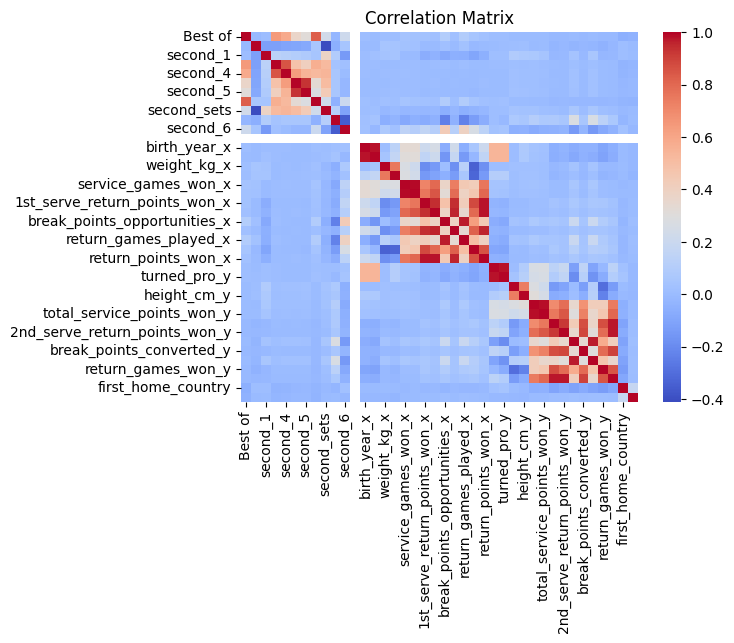

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
corr_matrix

sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)

# Set plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [390]:
df.columns

Index(['Location', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of',
       'first_name', 'second_name', 'first_rank', 'second_rank', 'first_1',
       'second_1', 'first_2', 'second_2', 'first_3', 'second_3', 'first_4',
       'second_4', 'first_5', 'second_5', 'first_sets', 'second_sets',
       'first_6', 'second_6', 'Country_x', 'win', 'player_id_x', 'full_name_x',
       'flag_code_x', 'birth_year_x', 'turned_pro_x', 'weight_kg_x',
       'height_cm_x', 'service_games_won_x', 'total_service_points_won_x',
       '1st_serve_return_points_won_x', '2nd_serve_return_points_won_x',
       'break_points_opportunities_x', 'break_points_converted_x',
       'return_games_played_x', 'return_games_won_x', 'return_points_won_x',
       'Country_y', 'player_id_y', 'full_name_y', 'flag_code_y',
       'birth_year_y', 'turned_pro_y', 'weight_kg_y', 'height_cm_y',
       'service_games_won_y', 'total_service_points_won_y',
       '1st_serve_return_points_won_y', '2nd_serve_return_points_

In [391]:
cols_keep = [
  'Series', 'Court', 'Surface', 'Round', 'Best of', 'Date',
  'first_rank', 'second_rank',
  'weight_kg_x', 'height_cm_x',
  'weight_kg_y', 'height_cm_y', 
  'birth_year_x', 'turned_pro_x',  'birth_year_y', 'first_home_country','second_home_country', 'first_1',
  'second_1', 'first_2', 'second_2', 'first_3', 'second_3', 'first_4',
  'second_4', 'first_5', 'second_5', 'first_6', 'second_6',
  'win', 'service_games_won_x', 'total_service_points_won_x',
  '1st_serve_return_points_won_x', '2nd_serve_return_points_won_x',
  'break_points_opportunities_x', 'break_points_converted_x',
  'return_games_played_x', 'return_games_won_x', 'return_points_won_x',
  'service_games_won_y', 'total_service_points_won_y',
  '1st_serve_return_points_won_y', '2nd_serve_return_points_won_y',
  'break_points_opportunities_y', 'break_points_converted_y',
  'return_games_played_y', 'return_games_won_y', 'return_points_won_y',
]

prepared_df = df[cols_keep]
prepared_df


,Series,Court,Surface,Round,Best of,Date,first_rank,second_rank,weight_kg_x,height_cm_x,...,return_points_won_x,service_games_won_y,total_service_points_won_y,1st_serve_return_points_won_y,2nd_serve_return_points_won_y,break_points_opportunities_y,break_points_converted_y,return_games_played_y,return_games_won_y,return_points_won_y
0,ATP250,Outdoor,Hard,1st Round,3.0,2023-01-01,61.0,68.0,77.0,180.0,...,0.35,0.82,0.65,0.30,0.51,6479,0.41,10739,0.24,0.38
1,Masters 1000,Outdoor,Hard,1st Round,3.0,2022-03-24,97,81.0,82.0,196.0,...,0.34,0.82,0.65,0.30,0.51,6479,0.41,10739,0.24,0.38
2,Grand Slam,Outdoor,Hard,1st Round,5.0,2021-08-31,2,79.0,81.0,198.0,...,0.39,0.82,0.65,0.30,0.51,6479,0.41,10739,0.24,0.38
3,ATP250,Indoor,Hard,1st Round,3.0,2020-10-14,6.0,53.0,81.0,198.0,...,0.39,0.82,0.65,0.30,0.51,6479,0.41,10739,0.24,0.38
4,ATP250,Outdoor,Clay,Quarterfinals,3.0,2021-05-21,26,52.0,88.0,198.0,...,0.37,0.82,0.65,0.30,0.51,6479,0.41,10739,0.24,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,ATP500,Outdoor,Clay,1st Round,3.0,2013-04-22,309.0,280.0,74.0,175.0,...,0.34,0.51,0.51,0.33,0.49,27,0.41,44,0.25,0.40
55205,ATP250,Outdoor,Hard,1st Round,3.0,2015-09-29,266.0,340.0,80.0,185.0,...,0.34,0.56,0.54,0.21,0.53,2,0.50,10,0.10,0.32
55206,ATP250,Indoor,Hard,1st Round,3.0,2012-02-14,438.0,719.0,73.0,175.0,...,0.38,0.69,0.59,0.32,0.48,6,0.67,17,0.24,0.38
55207,ATP250,Indoor,Hard,2nd Round,3.0,2012-02-16,438.0,393.0,73.0,175.0,...,0.38,0.60,0.59,0.29,0.47,5,0.40,11,0.18,0.37


## Encoding

In [392]:
prepared_df.dtypes

Series                                   object
Court                                    object
Surface                                  object
Round                                    object
Best of                                 float64
Date                             datetime64[ns]
first_rank                               object
second_rank                              object
weight_kg_x                             float64
height_cm_x                             float64
weight_kg_y                             float64
height_cm_y                             float64
birth_year_x                            float64
turned_pro_x                            float64
birth_year_y                            float64
first_home_country                        int64
second_home_country                       int64
first_1                                 float64
second_1                                float64
first_2                                  object
second_2                                

In [393]:
prepared_df['Series'].unique()

array(['ATP250', 'Masters 1000', 'Grand Slam', 'International', 'Masters',
       'ATP500', 'Masters Cup', 'International Gold'], dtype=object)

In [394]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


encoded_df = pd.get_dummies(prepared_df['Series'])
prepared_df = pd.concat([prepared_df, encoded_df], axis=1)
prepared_df = prepared_df.drop('Series', axis=1)

prepared_df

,Court,Surface,Round,Best of,Date,first_rank,second_rank,weight_kg_x,height_cm_x,weight_kg_y,...,return_games_won_y,return_points_won_y,ATP250,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup
0,Outdoor,Hard,1st Round,3.0,2023-01-01,61.0,68.0,77.0,180.0,75.000000,...,0.24,0.38,1,0,0,0,0,0,0,0
1,Outdoor,Hard,1st Round,3.0,2022-03-24,97,81.0,82.0,196.0,75.000000,...,0.24,0.38,0,0,0,0,0,0,1,0
2,Outdoor,Hard,1st Round,5.0,2021-08-31,2,79.0,81.0,198.0,75.000000,...,0.24,0.38,0,0,1,0,0,0,0,0
3,Indoor,Hard,1st Round,3.0,2020-10-14,6.0,53.0,81.0,198.0,75.000000,...,0.24,0.38,1,0,0,0,0,0,0,0
4,Outdoor,Clay,Quarterfinals,3.0,2021-05-21,26,52.0,88.0,198.0,75.000000,...,0.24,0.38,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,Outdoor,Clay,1st Round,3.0,2013-04-22,309.0,280.0,74.0,175.0,75.032124,...,0.25,0.40,0,1,0,0,0,0,0,0
55205,Outdoor,Hard,1st Round,3.0,2015-09-29,266.0,340.0,80.0,185.0,73.000000,...,0.10,0.32,1,0,0,0,0,0,0,0
55206,Indoor,Hard,1st Round,3.0,2012-02-14,438.0,719.0,73.0,175.0,75.032124,...,0.24,0.38,1,0,0,0,0,0,0,0
55207,Indoor,Hard,2nd Round,3.0,2012-02-16,438.0,393.0,73.0,175.0,84.000000,...,0.18,0.37,1,0,0,0,0,0,0,0


In [395]:
prepared_df['Court'].unique()

array(['Outdoor', 'Indoor'], dtype=object)

In [396]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
prepared_df['encoded_court'] = label_encoder.fit_transform(prepared_df['Court'])
prepared_df = prepared_df.drop('Court', axis=1)
prepared_df

,Surface,Round,Best of,Date,first_rank,second_rank,weight_kg_x,height_cm_x,weight_kg_y,height_cm_y,...,return_points_won_y,ATP250,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup,encoded_court
0,Hard,1st Round,3.0,2023-01-01,61.0,68.0,77.0,180.0,75.000000,185.000000,...,0.38,1,0,0,0,0,0,0,0,1
1,Hard,1st Round,3.0,2022-03-24,97,81.0,82.0,196.0,75.000000,185.000000,...,0.38,0,0,0,0,0,0,1,0,1
2,Hard,1st Round,5.0,2021-08-31,2,79.0,81.0,198.0,75.000000,185.000000,...,0.38,0,0,1,0,0,0,0,0,1
3,Hard,1st Round,3.0,2020-10-14,6.0,53.0,81.0,198.0,75.000000,185.000000,...,0.38,1,0,0,0,0,0,0,0,0
4,Clay,Quarterfinals,3.0,2021-05-21,26,52.0,88.0,198.0,75.000000,185.000000,...,0.38,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,Clay,1st Round,3.0,2013-04-22,309.0,280.0,74.0,175.0,75.032124,176.310889,...,0.40,0,1,0,0,0,0,0,0,1
55205,Hard,1st Round,3.0,2015-09-29,266.0,340.0,80.0,185.0,73.000000,183.000000,...,0.32,1,0,0,0,0,0,0,0,1
55206,Hard,1st Round,3.0,2012-02-14,438.0,719.0,73.0,175.0,75.032124,176.310889,...,0.38,1,0,0,0,0,0,0,0,0
55207,Hard,2nd Round,3.0,2012-02-16,438.0,393.0,73.0,175.0,84.000000,188.000000,...,0.37,1,0,0,0,0,0,0,0,0


In [397]:
prepared_df['Surface'].unique()

array(['Hard', 'Clay', 'Grass', 'Carpet'], dtype=object)

In [398]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
prepared_df['encoded_surface'] = label_encoder.fit_transform(prepared_df['Surface'])
prepared_df = prepared_df.drop('Surface', axis=1)
prepared_df


,Round,Best of,Date,first_rank,second_rank,weight_kg_x,height_cm_x,weight_kg_y,height_cm_y,birth_year_x,...,ATP250,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup,encoded_court,encoded_surface
0,1st Round,3.0,2023-01-01,61.0,68.0,77.0,180.0,75.000000,185.000000,1993.0,...,1,0,0,0,0,0,0,0,1,3
1,1st Round,3.0,2022-03-24,97,81.0,82.0,196.0,75.000000,185.000000,1996.0,...,0,0,0,0,0,0,1,0,1,3
2,1st Round,5.0,2021-08-31,2,79.0,81.0,198.0,75.000000,185.000000,1996.0,...,0,0,1,0,0,0,0,0,1,3
3,1st Round,3.0,2020-10-14,6.0,53.0,81.0,198.0,75.000000,185.000000,1996.0,...,1,0,0,0,0,0,0,0,0,3
4,Quarterfinals,3.0,2021-05-21,26,52.0,88.0,198.0,75.000000,185.000000,1996.0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,1st Round,3.0,2013-04-22,309.0,280.0,74.0,175.0,75.032124,176.310889,1988.0,...,0,1,0,0,0,0,0,0,1,1
55205,1st Round,3.0,2015-09-29,266.0,340.0,80.0,185.0,73.000000,183.000000,1989.0,...,1,0,0,0,0,0,0,0,1,3
55206,1st Round,3.0,2012-02-14,438.0,719.0,73.0,175.0,75.032124,176.310889,1987.0,...,1,0,0,0,0,0,0,0,0,3
55207,2nd Round,3.0,2012-02-16,438.0,393.0,73.0,175.0,84.000000,188.000000,1987.0,...,1,0,0,0,0,0,0,0,0,3


In [399]:
prepared_df['Round'].unique()

array(['1st Round', 'Quarterfinals', '3rd Round', '4th Round',
       'The Final', '2nd Round', 'Semifinals', 'Round Robin'],
      dtype=object)

In [400]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
prepared_df['encoded_round'] = label_encoder.fit_transform(prepared_df['Round'])
prepared_df = prepared_df.drop('Round', axis=1)
prepared_df


,Best of,Date,first_rank,second_rank,weight_kg_x,height_cm_x,weight_kg_y,height_cm_y,birth_year_x,turned_pro_x,...,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup,encoded_court,encoded_surface,encoded_round
0,3.0,2023-01-01,61.0,68.0,77.0,180.0,75.000000,185.000000,1993.0,2014.0,...,0,0,0,0,0,0,0,1,3,0
1,3.0,2022-03-24,97,81.0,82.0,196.0,75.000000,185.000000,1996.0,2013.0,...,0,0,0,0,0,1,0,1,3,0
2,5.0,2021-08-31,2,79.0,81.0,198.0,75.000000,185.000000,1996.0,2014.0,...,0,1,0,0,0,0,0,1,3,0
3,3.0,2020-10-14,6.0,53.0,81.0,198.0,75.000000,185.000000,1996.0,2014.0,...,0,0,0,0,0,0,0,0,3,0
4,3.0,2021-05-21,26,52.0,88.0,198.0,75.000000,185.000000,1996.0,2013.0,...,0,0,0,0,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,3.0,2013-04-22,309.0,280.0,74.0,175.0,75.032124,176.310889,1988.0,2006.0,...,1,0,0,0,0,0,0,1,1,0
55205,3.0,2015-09-29,266.0,340.0,80.0,185.0,73.000000,183.000000,1989.0,2008.0,...,0,0,0,0,0,0,0,1,3,0
55206,3.0,2012-02-14,438.0,719.0,73.0,175.0,75.032124,176.310889,1987.0,2006.0,...,0,0,0,0,0,0,0,0,3,0
55207,3.0,2012-02-16,438.0,393.0,73.0,175.0,84.000000,188.000000,1987.0,2006.0,...,0,0,0,0,0,0,0,0,3,1


In [401]:
prepared_df.dtypes

Best of                                 float64
Date                             datetime64[ns]
first_rank                               object
second_rank                              object
weight_kg_x                             float64
height_cm_x                             float64
weight_kg_y                             float64
height_cm_y                             float64
birth_year_x                            float64
turned_pro_x                            float64
birth_year_y                            float64
first_home_country                        int64
second_home_country                       int64
first_1                                 float64
second_1                                float64
first_2                                  object
second_2                                 object
first_3                                  object
second_3                                 object
first_4                                 float64
second_4                                

In [402]:
avg = prepared_df['first_2'].unique()[:-1].mean()
prepared_df.loc[prepared_df['first_2'] == ' ', 'first_2'] = avg
prepared_df['first_2'] = prepared_df['first_2'].astype(float)
prepared_df['first_2'].unique()


array([6. , 7. , 0. , 1. , 4. , 3. , 5. , 2. , 3.5])

In [403]:
avg = prepared_df['second_2'].unique()[:-1].mean()
prepared_df.loc[prepared_df['second_2'] == ' ', 'second_2'] = avg
prepared_df['second_2'] = prepared_df['second_2'].astype(float)
prepared_df['second_2'].unique()


array([7. , 2. , 3. , 6. , 4. , 1. , 5. , 0. , 3.5])

In [404]:
avg = (prepared_df['first_3'].unique()[:-2] + prepared_df['first_3'].unique()[-1:]).mean()
prepared_df.loc[prepared_df['first_3'] == ' ', 'first_3'] = avg
prepared_df['first_3'] = prepared_df['first_3'].astype(float)
prepared_df['first_3'].unique()

array([7.        , 0.        , 6.        , 2.        , 5.        ,
       4.        , 3.        , 4.85714286, 1.        ])

In [405]:
avg = prepared_df['second_3'].unique()[:-1].mean()
prepared_df.loc[prepared_df['second_3'] == ' ', 'second_3'] = avg
prepared_df['second_3'] = prepared_df['second_3'].astype(float)
prepared_df['second_3'].unique()

array([5. , 0. , 1. , 3. , 2. , 4. , 6. , 7. , 3.5])

In [406]:
prepared_df['first_rank'] = pd.to_numeric(prepared_df['first_rank'], errors='coerce')

mean_value = np.mean(prepared_df['first_rank'].dropna())

prepared_df.loc[prepared_df['first_rank'].isnull(), 'first_rank'] = mean_value

In [407]:
prepared_df['second_rank'] = pd.to_numeric(prepared_df['second_rank'], errors='coerce')

mean_value = np.mean(prepared_df['second_rank'].dropna())

prepared_df.loc[prepared_df['second_rank'].isnull(), 'second_rank'] = mean_value

In [408]:
prepared_df.isna().sum()


Best of                            0
Date                               0
first_rank                         0
second_rank                        0
weight_kg_x                        0
height_cm_x                        0
weight_kg_y                        0
height_cm_y                        0
birth_year_x                      89
turned_pro_x                      89
birth_year_y                     190
first_home_country                 0
second_home_country                0
first_1                            0
second_1                           0
first_2                            0
second_2                           0
first_3                            0
second_3                           0
first_4                            0
second_4                           0
first_5                            0
second_5                           0
first_6                            0
second_6                           0
win                                0
service_games_won_x                0
t

In [409]:
prepared_df = prepared_df.dropna()



In [410]:
end_mapping  = {
    '_x': 'first_',
    '_y': 'second_'
}

cols_to_rename = {
    old_name: end_mapping[old_name[-2:]] + old_name[:-2] for old_name in prepared_df.columns if old_name[-2:] in end_mapping
}
prepared_df = prepared_df.rename(columns=cols_to_rename)
prepared_df

,Best of,Date,first_rank,second_rank,first_weight_kg,first_height_cm,second_weight_kg,second_height_cm,first_birth_year,first_turned_pro,...,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup,encoded_court,encoded_surface,encoded_round
0,3.0,2023-01-01,61.0,68.0,77.0,180.0,75.000000,185.000000,1993.0,2014.0,...,0,0,0,0,0,0,0,1,3,0
1,3.0,2022-03-24,97.0,81.0,82.0,196.0,75.000000,185.000000,1996.0,2013.0,...,0,0,0,0,0,1,0,1,3,0
2,5.0,2021-08-31,2.0,79.0,81.0,198.0,75.000000,185.000000,1996.0,2014.0,...,0,1,0,0,0,0,0,1,3,0
3,3.0,2020-10-14,6.0,53.0,81.0,198.0,75.000000,185.000000,1996.0,2014.0,...,0,0,0,0,0,0,0,0,3,0
4,3.0,2021-05-21,26.0,52.0,88.0,198.0,75.000000,185.000000,1996.0,2013.0,...,0,0,0,0,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,3.0,2013-04-22,309.0,280.0,74.0,175.0,75.032124,176.310889,1988.0,2006.0,...,1,0,0,0,0,0,0,1,1,0
55205,3.0,2015-09-29,266.0,340.0,80.0,185.0,73.000000,183.000000,1989.0,2008.0,...,0,0,0,0,0,0,0,1,3,0
55206,3.0,2012-02-14,438.0,719.0,73.0,175.0,75.032124,176.310889,1987.0,2006.0,...,0,0,0,0,0,0,0,0,3,0
55207,3.0,2012-02-16,438.0,393.0,73.0,175.0,84.000000,188.000000,1987.0,2006.0,...,0,0,0,0,0,0,0,0,3,1


In [411]:
prepared_df.columns

Index(['Best of', 'Date', 'first_rank', 'second_rank', 'first_weight_kg',
       'first_height_cm', 'second_weight_kg', 'second_height_cm',
       'first_birth_year', 'first_turned_pro', 'second_birth_year',
       'first_home_country', 'second_home_country', 'first_1', 'second_1',
       'first_2', 'second_2', 'first_3', 'second_3', 'first_4', 'second_4',
       'first_5', 'second_5', 'first_6', 'second_6', 'win',
       'first_service_games_won', 'first_total_service_points_won',
       'first_1st_serve_return_points_won',
       'first_2nd_serve_return_points_won', 'first_break_points_opportunities',
       'first_break_points_converted', 'first_return_games_played',
       'first_return_games_won', 'first_return_points_won',
       'second_service_games_won', 'second_total_service_points_won',
       'second_1st_serve_return_points_won',
       'second_2nd_serve_return_points_won',
       'second_break_points_opportunities', 'second_break_points_converted',
       'second_return_ga

Adding rows with 0 win column

In [412]:
prepared_df = prepared_df[[col for col in prepared_df.columns if col not in ['first_turned_pro']]]
prepared_df

,Best of,Date,first_rank,second_rank,first_weight_kg,first_height_cm,second_weight_kg,second_height_cm,first_birth_year,second_birth_year,...,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup,encoded_court,encoded_surface,encoded_round
0,3.0,2023-01-01,61.0,68.0,77.0,180.0,75.000000,185.000000,1993.0,1986.0,...,0,0,0,0,0,0,0,1,3,0
1,3.0,2022-03-24,97.0,81.0,82.0,196.0,75.000000,185.000000,1996.0,1986.0,...,0,0,0,0,0,1,0,1,3,0
2,5.0,2021-08-31,2.0,79.0,81.0,198.0,75.000000,185.000000,1996.0,1986.0,...,0,1,0,0,0,0,0,1,3,0
3,3.0,2020-10-14,6.0,53.0,81.0,198.0,75.000000,185.000000,1996.0,1986.0,...,0,0,0,0,0,0,0,0,3,0
4,3.0,2021-05-21,26.0,52.0,88.0,198.0,75.000000,185.000000,1996.0,1986.0,...,0,0,0,0,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,3.0,2013-04-22,309.0,280.0,74.0,175.0,75.032124,176.310889,1988.0,1989.0,...,1,0,0,0,0,0,0,1,1,0
55205,3.0,2015-09-29,266.0,340.0,80.0,185.0,73.000000,183.000000,1989.0,1987.0,...,0,0,0,0,0,0,0,1,3,0
55206,3.0,2012-02-14,438.0,719.0,73.0,175.0,75.032124,176.310889,1987.0,1989.0,...,0,0,0,0,0,0,0,0,3,0
55207,3.0,2012-02-16,438.0,393.0,73.0,175.0,84.000000,188.000000,1987.0,1987.0,...,0,0,0,0,0,0,0,0,3,1


In [413]:
num_rows = len(prepared_df)
num_rows_to_extract = int(num_rows * 0.5)  # 50% of the rows
df_extracted = prepared_df.sample(n=num_rows_to_extract, random_state=42)
df_extracted

,Best of,Date,first_rank,second_rank,first_weight_kg,first_height_cm,second_weight_kg,second_height_cm,first_birth_year,second_birth_year,...,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup,encoded_court,encoded_surface,encoded_round
20005,5.0,2012-01-17,181.0,83.0,77.0,178.0,70.0,183.0,1981.0,1990.0,...,0,1,0,0,0,0,0,1,3,0
11514,3.0,2017-08-04,47.0,25.0,70.0,178.0,74.0,178.0,1983.0,1987.0,...,0,0,0,0,0,0,0,1,1,6
18784,3.0,2017-03-24,4.0,74.0,75.0,178.0,93.0,203.0,1989.0,1986.0,...,0,0,0,0,0,1,0,1,3,1
51910,3.0,2012-09-25,64.0,1066.0,80.0,188.0,79.0,183.0,1987.0,1992.0,...,0,0,0,0,0,0,0,0,3,0
3277,3.0,2018-05-10,22.0,10.0,83.0,188.0,68.0,180.0,1995.0,1990.0,...,0,0,0,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42342,3.0,2015-06-21,59.0,48.0,82.0,178.0,77.0,170.0,1985.0,1980.0,...,1,0,0,0,0,0,0,1,2,0
36240,3.0,2009-04-30,13.0,31.0,88.0,193.0,81.0,183.0,1955.0,1981.0,...,0,0,0,0,0,1,0,1,1,2
9017,3.0,2015-10-07,45.0,15.0,74.0,185.0,73.0,185.0,1989.0,1981.0,...,1,0,0,0,0,0,0,1,3,0
52883,5.0,2005-05-24,105.0,125.0,74.0,173.0,85.0,201.0,1977.0,1976.0,...,0,1,0,0,0,0,0,1,1,0


In [414]:
df_extracted.index

Int64Index([20005, 11514, 18784, 51910,  3277, 22510, 10263, 39010, 40372,
            31947,
            ...
            53536, 32541, 41317, 25884,  9995, 42342, 36240,  9017, 52883,
            12865],
           dtype='int64', length=27465)

In [415]:
prepared_df = prepared_df.drop(df_extracted.index)
prepared_df

,Best of,Date,first_rank,second_rank,first_weight_kg,first_height_cm,second_weight_kg,second_height_cm,first_birth_year,second_birth_year,...,ATP500,Grand Slam,International,International Gold,Masters,Masters 1000,Masters Cup,encoded_court,encoded_surface,encoded_round
2,5.0,2021-08-31,2.0,79.0,81.0,198.0,75.000000,185.000000,1996.0,1986.0,...,0,1,0,0,0,0,0,1,3,0
5,5.0,2018-09-02,6.0,25.0,77.0,188.0,75.000000,185.000000,1987.0,1986.0,...,0,1,0,0,0,0,0,1,3,2
8,3.0,2007-05-06,5.0,15.0,77.0,188.0,75.000000,185.000000,1987.0,1986.0,...,0,0,1,0,0,0,0,1,1,7
9,3.0,2010-10-14,2.0,31.0,77.0,188.0,75.000000,185.000000,1987.0,1986.0,...,0,0,0,0,0,1,0,1,3,2
10,3.0,2006-10-18,17.0,27.0,77.0,188.0,75.000000,185.000000,1987.0,1986.0,...,0,0,0,0,1,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55203,3.0,2012-09-17,81.0,785.0,74.0,173.0,80.000000,185.000000,1983.0,1991.0,...,0,0,0,0,0,0,0,0,3,0
55204,3.0,2013-04-22,309.0,280.0,74.0,175.0,75.032124,176.310889,1988.0,1989.0,...,1,0,0,0,0,0,0,1,1,0
55205,3.0,2015-09-29,266.0,340.0,80.0,185.0,73.000000,183.000000,1989.0,1987.0,...,0,0,0,0,0,0,0,1,3,0
55206,3.0,2012-02-14,438.0,719.0,73.0,175.0,75.032124,176.310889,1987.0,1989.0,...,0,0,0,0,0,0,0,0,3,0


In [416]:
import pandas as pd
import random

def swap_columns(data):
    df_copy = data.copy()
    df_swapped = data.copy() 
    for column in data.columns:
        if column.startswith('first_'):
            suffix = column[6:]
            df_swapped[['first_'+suffix, 'second_'+suffix]] = df_swapped[['second_'+suffix, 'first_'+suffix]]
    df_swapped['win'] = 0
    return df_swapped
df_extracted = swap_columns(df_extracted).convert_dtypes()
dff = pd.concat([df_extracted,prepared_df])
# shuffled_df


In [417]:
dff['win'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

<ipython-input-418-a4f601125d43>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dff.corr()


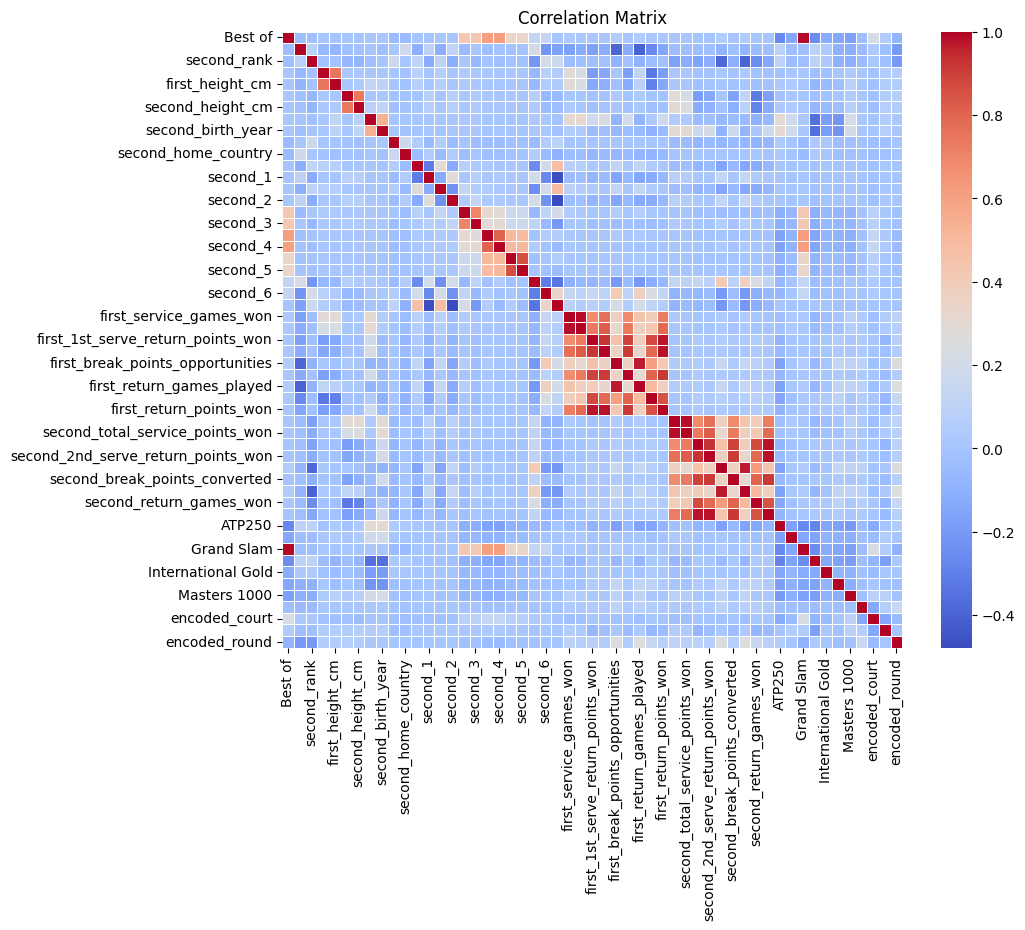

In [418]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
corr_matrix = dff.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [419]:
dff.to_csv('/content/drive/MyDrive/DataMiningProject/prepared_df.csv')

In [420]:
dff.columns

Index(['Best of', 'Date', 'first_rank', 'second_rank', 'first_weight_kg',
       'first_height_cm', 'second_weight_kg', 'second_height_cm',
       'first_birth_year', 'second_birth_year', 'first_home_country',
       'second_home_country', 'first_1', 'second_1', 'first_2', 'second_2',
       'first_3', 'second_3', 'first_4', 'second_4', 'first_5', 'second_5',
       'first_6', 'second_6', 'win', 'first_service_games_won',
       'first_total_service_points_won', 'first_1st_serve_return_points_won',
       'first_2nd_serve_return_points_won', 'first_break_points_opportunities',
       'first_break_points_converted', 'first_return_games_played',
       'first_return_games_won', 'first_return_points_won',
       'second_service_games_won', 'second_total_service_points_won',
       'second_1st_serve_return_points_won',
       'second_2nd_serve_return_points_won',
       'second_break_points_opportunities', 'second_break_points_converted',
       'second_return_games_played', 'second_return